# Benchmarks for ZINC 12K

## Background
ZINC is a free database of commercially-available compounds for virtual screening. ZINC contains over 230 million purchasable compounds in ready-to-dock, 3D formats. ZINC also contains over 750 million purchasable compounds that can be searched for analogs. ZINC12K contains a 12,000 sample subset of ZINC molecular graphs.

## Benchmarking
**The goal** of this benchmark is to have the best predictive model for synthetic accessibility (SA), logP and constrained solubility (Score).

## Description of readout:
- SA: Synthetic accessibility score.
- LogP: Log P, octanol-water partition coefficient.
- Score: constrained solubility which is the term logP − SA − cycle (octanol-water partition coefficients, logP, penalized by the synthetic accessibility score, SA, and number of long cycles, cycle).

The performance measure is the mean squared error (MSE) between the predicted and the ground truth value for each molecular graph.
  - Optimization objective: Lower value

## Data resource
References: 
- [ZINC: A Free Tool to Discover Chemistry for Biology](https://pubs.acs.org/doi/10.1021/ci3001277)
- [Benchmarking Graph Neural Networks](https://arxiv.org/pdf/2003.00982)


## Train/test split



In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import MultiTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[2]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

In [2]:
# Get the owner and organization
org = "Graphium"
data_name = "zinc12k"
dataset_name = f"{data_name}-v1"
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"

owner = HubOwner(slug=org.lower(), type="organization")
owner

HubOwner(slug='graphium', external_id=None, type='organization')

In [3]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"

FIGURE_DIR = f"{gcp_root}/figures"

### Load existing data

In [4]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json(DATASET_JSON)

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [5]:
data_cols = ["SA", "logp", "score"]

mol_col = "smiles"

### Get the train/test splits

In [6]:
import torch

split_path = f"{gcp_root}/data/raw/ZINC12k_random_splits.pt"
with dm.fs.fsspec.open(split_path) as f:
    split_dict = torch.load(f)

splits = tuple(split_dict.values())

### Check distribution of train/test set in the chemical space

  0%|          | 0/12000 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


'https://storage.googleapis.com/polaris-public/polaris-recipes/org-Graphium/zinc12k/figures/chemspace.png'

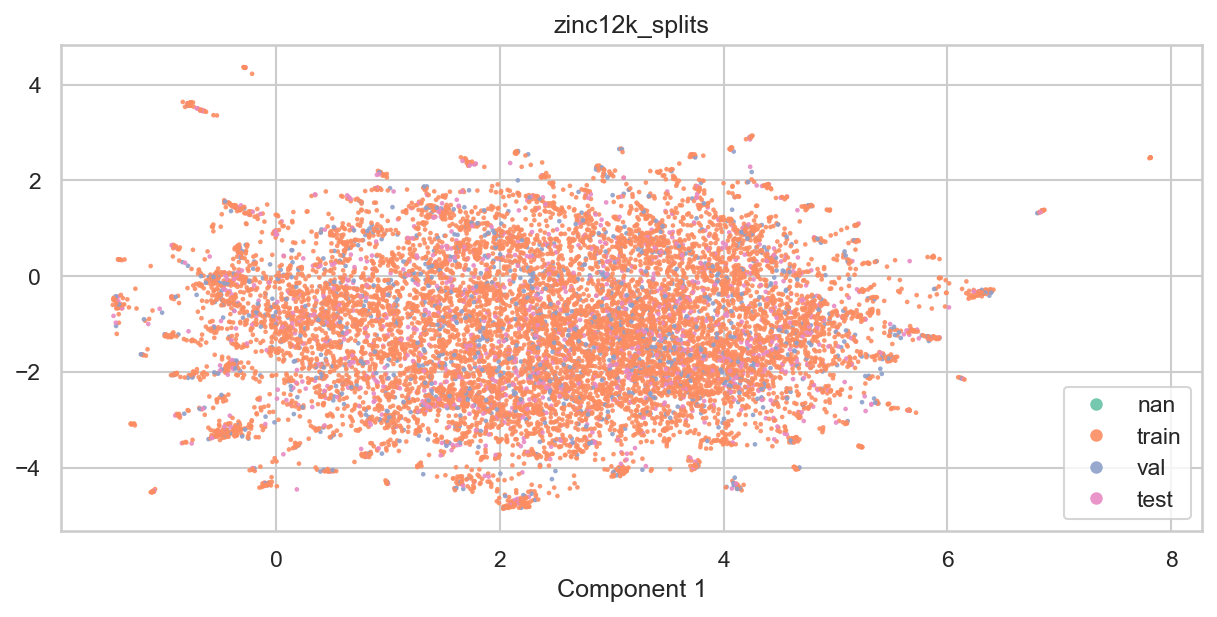

In [7]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(
    mols=dataset.table[mol_col].to_list(),
    train_test_dict={"zinc12k_splits": splits},
)

# export the figure to remote path
from utils.auroris_utils import save_image

save_image(fig, dm.fs.join(FIGURE_DIR, f"chemspace.png"))

## Define multitask benchmarks with the above defined split

In [8]:
benchmark_splits = (splits[0] + splits[1], splits[2])

In [9]:
benchmark_version = "v1"
benchmark_name = f"{data_name}-{benchmark_version}"
readme_name = f"org-Graphium/{data_name}/{data_name}_benchmark_readme.md"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"


benchmark = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    target_types={col: "regression" for col in data_cols},
    input_cols=mol_col,
    split=benchmark_splits,
    metrics=["mean_squared_error"],
    tags=["multitask"],
    description="A multitask regression benchmark for ZINC12K dataset.",
    owner=owner,
    readme=load_readme(readme_name),
)
path = benchmark.to_json(BENCHMARK_SAVE_DIR)
print(path)

2024-07-16 23:12:34.292 | INFO     | polaris._mixins:md5sum:27 - Computing the checksum. This can be slow for large datasets.
2024-07-16 23:12:34.304 | INFO     | polaris._mixins:md5sum:27 - Computing the checksum. This can be slow for large datasets.


gs://polaris-public/polaris-recipes/org-Graphium/zinc12k/benchmarks/zinc12k-v1/benchmark.json


In [10]:
# Upload to hub
benchmark.upload_to_hub(owner=owner, access="private")

2024-07-16 23:12:41.020 | SUCCESS  | polaris.hub.client:upload_benchmark:675 - Your benchmark has been successfully uploaded to the Hub. View it here: https://polarishub.io/benchmarks/graphium/zinc12k-v1


{'id': 'GWvFTpqU7ZG2zNldcPVyc',
 'createdAt': '2024-07-17T03:12:40.910Z',
 'deletedAt': None,
 'name': 'zinc12k-v1',
 'slug': 'zinc12k-v1',
 'description': 'A multitask regression benchmark for ZINC12K dataset.',
 'tags': ['multitask'],
 'userAttributes': {},
 'access': 'private',
 'isCertified': False,
 'polarisVersion': 'dev',
 'readme': '## Background\n\n\n## Assay information\n\n\n## Description of readout:\n\n\n## Data resource\n\n',
 'state': 'ready',
 'ownerId': 'zMTB7lQiiukqEmLQF7EjT',
 'creatorId': 'NKnaHGybLqwSHcaMEHqfF',
 'datasetId': 'lyuMH2u2azzmsvdwtrMu3',
 'targetCols': ['SA', 'logp', 'score'],
 'inputCols': ['smiles'],
 'md5Sum': 'c4350e3afeeb66418c00db2ce89568ff',
 'metrics': ['mean_squared_error'],
 'mainMetric': 'mean_squared_error',
 'split': [[3785,
   4440,
   7186,
   232,
   4316,
   7074,
   7326,
   5777,
   8393,
   1815,
   1253,
   75,
   11695,
   11194,
   2989,
   1767,
   5504,
   906,
   7401,
   7891,
   7544,
   5729,
   9046,
   9807,
   8275,
   49